## 데이터불러오기

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import datetime
import math
from datetime import date

In [35]:
retail_df = pd.read_csv('/Users/sbpark/Desktop/raw/20210803비즈오더.csv')
#retail_df.drop('OWNER', axis = 1, inplace= True)
#retail_df.head()

In [36]:
# null값 있는지 체크
print(retail_df.shape,'\n')
retail_df.info()

(181221, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181221 entries, 0 to 181220
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   OWNER            181221 non-null  object
 1   ORDER_COUNT      181221 non-null  int64 
 2   ORDER_PAY        181221 non-null  int64 
 3   LAST_ORDER_DATE  181221 non-null  object
 4   DATA_IN          181221 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.9+ MB


In [37]:
retail_df['LAST_ORDER_DATE'] = pd.to_datetime(retail_df['LAST_ORDER_DATE'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181221 entries, 0 to 181220
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   OWNER            181221 non-null  object        
 1   ORDER_COUNT      181221 non-null  int64         
 2   ORDER_PAY        181221 non-null  int64         
 3   LAST_ORDER_DATE  181221 non-null  datetime64[ns]
 4   DATA_IN          181221 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.9+ MB


In [84]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#retail_df.describe()

## 데이터 탐색

(array([1.80685e+05, 4.24000e+02, 7.20000e+01, 1.80000e+01, 9.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([       0. ,  4334897.5,  8669795. , 13004692.5, 17339590. ,
        21674487.5, 26009385. , 30344282.5, 34679180. , 39014077.5,
        43348975. ]),
 <BarContainer object of 10 artists>)

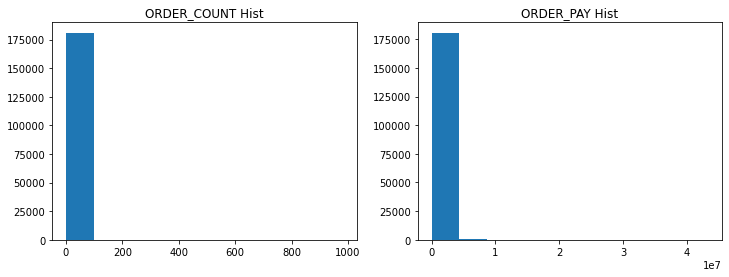

In [39]:
# 데이터 분포가 왜곡되어있음
fig, (ax1, ax2) = plt.subplots(figsize = (12,4), nrows = 1, ncols = 2)
ax1.set_title('ORDER_COUNT Hist')
ax1.hist(retail_df['ORDER_COUNT'])

ax2.set_title('ORDER_PAY Hist')
ax2.hist(retail_df['ORDER_PAY'])

In [91]:
#주문수가 1건인 사람들이 매우 많아 점수 기준에서 별도로 관리해야 함
#retail_df['ORDER_COUNT'].value_counts()

In [41]:
# 주문수 4건부터는 qcut으로 분류하고, 3건 이하는 최소 점수를 준다
retail_df['ORDER_COUNT_SCORE'] = pd.qcut(retail_df.loc[retail_df['ORDER_COUNT'] > 3,'ORDER_COUNT'], q = 4, labels = [4,3,2,1])
retail_df['ORDER_COUNT_SCORE'] = retail_df['ORDER_COUNT_SCORE'].cat.add_categories('5')
retail_df.loc[retail_df['ORDER_COUNT'] <= 3,'ORDER_COUNT_SCORE'] = '5'

In [42]:
retail_df['ORDER_COUNT_SCORE'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
181216    False
181217    False
181218    False
181219    False
181220    False
Name: ORDER_COUNT_SCORE, Length: 181221, dtype: bool

In [43]:
retail_df['ORDER_COUNT_SCORE'] =  pd.Categorical(retail_df['ORDER_COUNT_SCORE'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181221 entries, 0 to 181220
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OWNER              181221 non-null  object        
 1   ORDER_COUNT        181221 non-null  int64         
 2   ORDER_PAY          181221 non-null  int64         
 3   LAST_ORDER_DATE    181221 non-null  datetime64[ns]
 4   DATA_IN            181221 non-null  object        
 5   ORDER_COUNT_SCORE  181221 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 7.1+ MB


In [44]:
# 주문금액은 qcut으로 갯수에 따라 4개로 분류
retail_df['ORDER_PAY_SCORE'] = pd.qcut(retail_df.ORDER_PAY, q = 5, labels = [5,4,3,2,1])

In [45]:
# 마지막 주문일자는 오늘 일자 기준으로 계산. 일자가 짧을 수록 카테고리 숫자 줄어듦  
retail_df['LAST_ORDER_DATE_CAL']= (pd.to_datetime('2021/08/06') -retail_df['LAST_ORDER_DATE']).apply(lambda x: x / np.timedelta64(1,'D'))

In [46]:
retail_df['LAST_ORDER_DATE_SCORE'] = pd.qcut(retail_df.LAST_ORDER_DATE_CAL, q = 5, labels = [1,2,3,4,5])

In [47]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181221 entries, 0 to 181220
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OWNER                  181221 non-null  object        
 1   ORDER_COUNT            181221 non-null  int64         
 2   ORDER_PAY              181221 non-null  int64         
 3   LAST_ORDER_DATE        181221 non-null  datetime64[ns]
 4   DATA_IN                181221 non-null  object        
 5   ORDER_COUNT_SCORE      181221 non-null  category      
 6   ORDER_PAY_SCORE        181221 non-null  category      
 7   LAST_ORDER_DATE_CAL    181221 non-null  float64       
 8   LAST_ORDER_DATE_SCORE  181221 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.8+ MB


### 스코어 합산

In [48]:
# 점수가 높을 수록 사용자의 질은 낮다.
retail_df[['ORDER_COUNT_SCORE','ORDER_PAY_SCORE','LAST_ORDER_DATE_SCORE']].value_counts()

ORDER_COUNT_SCORE  ORDER_PAY_SCORE  LAST_ORDER_DATE_SCORE
5                  5                4                        8894
                                    5                        8455
                   4                4                        8442
                                    5                        7864
                                    3                        7818
                                                             ... 
1                  5                5                           1
                   4                2                           1
                   3                1                           1
                                    2                           1
2                  4                1                           1
Length: 118, dtype: int64

In [49]:
# 가중치 계산을 위해 범주형 데이터를 숫자로 변경
retail_df['ORDER_COUNT_SCORE']=retail_df.ORDER_COUNT_SCORE.astype(int)
retail_df['ORDER_PAY_SCORE']=retail_df.ORDER_PAY_SCORE.astype(int)
retail_df['LAST_ORDER_DATE_SCORE']=retail_df.LAST_ORDER_DATE_SCORE.astype(int)
retail_df.dtypes

OWNER                            object
ORDER_COUNT                       int64
ORDER_PAY                         int64
LAST_ORDER_DATE          datetime64[ns]
DATA_IN                          object
ORDER_COUNT_SCORE                 int64
ORDER_PAY_SCORE                   int64
LAST_ORDER_DATE_CAL             float64
LAST_ORDER_DATE_SCORE             int64
dtype: object

In [90]:
retail_df['total'] = retail_df['ORDER_COUNT_SCORE'] + retail_df['ORDER_PAY_SCORE'] + retail_df['LAST_ORDER_DATE_SCORE']
#retail_df.groupby('total')[['ORDER_COUNT','ORDER_PAY']].agg(['sum','count'])

In [52]:
# 가중치 설정 (가중치a * R + 가중치b * F + 가중치c * M, 단 a+b+c의 합은 1이다)

weights = []
grid_number = 20
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]

In [53]:
# 점수에 따른 고객 분류를 4단계로 나누고자 함

num_class = 5
class_level = np.linspace(1,5,num_class+1)[1:-1]
print(class_level)

def get_rank(class_level, score):
    rank = []
    for i in range(len(score)):
        for j in range(len(class_level)):
            if score[i] <= class_level[j]:
                rank.append(j+1)
                break
            elif score[i] > max(class_level):
                rank.append(len(class_level)+1)
                break
    return rank

[1.8 2.6 3.4 4.2]


In [25]:
# 고객별 점수를 구하고 순위를 매김
total_amount_of_sales = retail_df['ORDER_PAY'].sum()
max_std = 0 

for m in range(len(weights)): #range(0,1)
    score = []
    total = []
    score = retail_df['ORDER_COUNT_SCORE'] * weights[m][0] + retail_df['ORDER_PAY_SCORE'] * weights[m][1] + retail_df['ORDER_PAY_SCORE'] * weights[m][2]
    #total.append(get_rank(class_level, score))
    retail_df['total'] = get_rank(class_level, score)
    
    grouped_rfm_score = retail_df.groupby('total')['ORDER_PAY'].sum().reset_index()
    grouped_rfm_score['ORDER_PAY'] = grouped_rfm_score['ORDER_PAY'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['ORDER_PAY'].std()
    
    if max_std <= std_sales:
        max_std = std_sales
        optimal_weights = weights[m]


In [26]:
optimal_weights

(0.2, 0.75, 0.05)

In [54]:
# 적정 가중치를 고객 데이터에 반영해 랭크 계산

score = retail_df['ORDER_COUNT_SCORE'] * 0.2 + retail_df['ORDER_PAY_SCORE'] * 0.75 + retail_df['ORDER_PAY_SCORE'] * 0.05
retail_df['total'] = get_rank(class_level, score)

In [55]:
grouped_rfm_score = retail_df.groupby('total')['ORDER_PAY'].sum().reset_index()
grouped_rfm_score['ORDER_PAY'] = grouped_rfm_score['ORDER_PAY'].map(lambda x : x/total_amount_of_sales)

In [89]:
#grouped_rfm_score

In [57]:
grouped_rfm_score = retail_df.groupby('total')[['ORDER_PAY','ORDER_COUNT']].agg(['sum','count']).reset_index()

In [87]:
# 결과 스코어 : 5개 그룹으로 3만6천명 가량 씩 묶였고, 매출 비중은 1등급 사용자가 0.76을 차지.
#grouped_rfm_score

In [88]:
#retail_df.groupby('total')[['ORDER_PAY','ORDER_COUNT']].agg(['min','max']).reset_index()

In [31]:
retail_df.to_csv('output0819_3.csv', encoding='utf-8')

### 등급별 사용자의 특징

In [60]:
retail_df_use = retail_df[['OWNER', 'total','DATA_IN']]
retail_df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181221 entries, 0 to 181220
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   OWNER    181221 non-null  object
 1   total    181221 non-null  int64 
 2   DATA_IN  181221 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [62]:
comm_df = pd.read_csv('/Users/sbpark/Desktop/raw/20210803비즈오더_상품별.csv')
comm_df.drop(['OWNER.1','ORDER_COUNT','ORDER_PAY','LAST_ORDER_DATE','DATA_IN'], axis = 1, inplace = True)
#comm_df.head()

In [63]:
final_df = pd.merge(comm_df,retail_df_use, how = 'left', left_on ='OWNER', right_on = 'OWNER')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516819 entries, 0 to 1516818
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   OWNER    1516819 non-null  object
 1   PNAME    1516819 non-null  object
 2   total    1516819 non-null  int64 
 3   DATA_IN  1516819 non-null  object
dtypes: int64(1), object(3)
memory usage: 57.9+ MB


In [64]:
final_df['DATA_IN'] = pd.to_datetime(final_df['DATA_IN']).dt.date

In [82]:
# 그룹별 구매 상품
#final_df.groupby(['total','PNAME']).count()
(final_df.groupby(['total','PNAME']).count()).to_csv('output0819.csv', encoding='utf-8')

In [68]:
retail_df_use['DATA_IN'] = pd.to_datetime(retail_df_use['DATA_IN']).dt.date

/var/folders/jd/m9g9yr_x5fv1n0_0k9d28nx80000gn/T/ipykernel_6349/1128894087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df_use['DATA_IN'] = pd.to_datetime(retail_df_use['DATA_IN']).dt.date


In [70]:
test = final_df[(final_df['DATA_IN'] >= pd.to_datetime('2021/01/01').date())]

In [116]:
(test.groupby(['total','PNAME']).count()).to_csv('output0819_2.csv', encoding='utf-8')

## K-Means

In [71]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import datetime
import math

In [72]:
cust_df = retail_df.drop(['LAST_ORDER_DATE','DATA_IN' ,'ORDER_COUNT_SCORE','ORDER_PAY_SCORE','LAST_ORDER_DATE_SCORE'], axis = 1)

In [83]:
#cust_df.describe()

In [74]:
from sklearn.preprocessing import StandardScaler

X_features = cust_df[['LAST_ORDER_DATE_CAL','ORDER_COUNT','ORDER_PAY']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 5, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))


실루엣 스코어 : 0.641


In [75]:

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [76]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

/var/folders/jd/m9g9yr_x5fv1n0_0k9d28nx80000gn/T/ipykernel_6349/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
/var/folders/jd/m9g9yr_x5fv1n0_0k9d28nx80000gn/T/ipykernel_6349/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


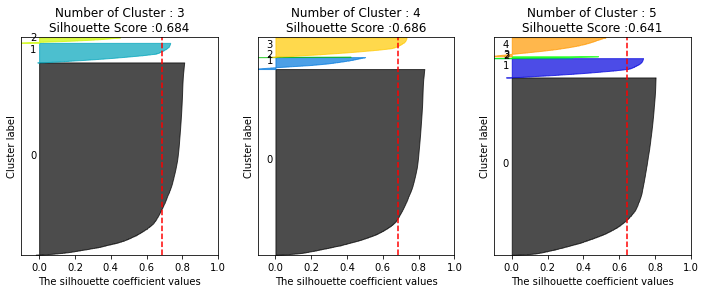

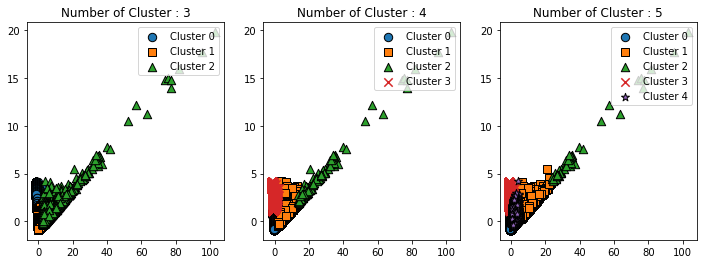

In [77]:
visualize_silhouette([ 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([ 3, 4, 5], X_features_scaled)

In [78]:
cust_df['LAST_ORDER_DATE_CAL_log'] = np.log1p(cust_df['LAST_ORDER_DATE_CAL'])
cust_df['ORDER_COUNT_log'] = np.log1p(cust_df['ORDER_COUNT'])
cust_df['ORDER_PAY_log'] = np.log1p(cust_df['ORDER_PAY'])

X_features = cust_df[['LAST_ORDER_DATE_CAL_log','ORDER_COUNT_log','ORDER_PAY_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 4, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.336


/var/folders/jd/m9g9yr_x5fv1n0_0k9d28nx80000gn/T/ipykernel_6349/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
/var/folders/jd/m9g9yr_x5fv1n0_0k9d28nx80000gn/T/ipykernel_6349/3935396419.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


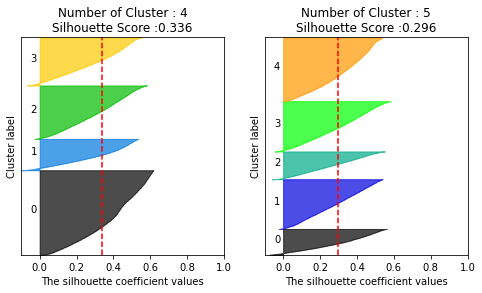

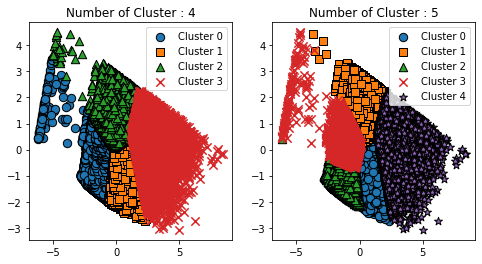

In [79]:
visualize_silhouette([4, 5], X_features_scaled)
visualize_kmeans_plot_multi([4, 5], X_features_scaled)

In [85]:
#cust_df.groupby('cluster_label')[['ORDER_COUNT' ,'ORDER_PAY', 'LAST_ORDER_DATE_CAL']].sum()

In [86]:
#cust_df['cluster_label'].value_counts()